# 1A.algo - Arbre et Trie

Le mot [trie](http://fr.wikipedia.org/wiki/Trie_%28informatique%29) est anglais et se prononce *traïlle*. Il sera défini plus bas. Cette structure de données est très adaptée à la recherche d'un mot dans une liste ordonnée. C'est aussi une histoire de dictionnaires imbriqués.

from jyquickhelper import add_notebook_menu
add_notebook_menu()

Rechercher un mot dans une liste est un problème simple. Et pourtant, cette tâche peut être plus ou moins rapide selon la façon dont on représente cette liste, voire de la compresser. L'objectif est ici de découvrir trois façons de construire un ensemble de mots avec des dictionnaires et des listes. La recherche d'un mot dans cet ensemble sera différente à chaque fois.
On veut mesurer le temps qu'il faut pour vérifier qu'un mot appartient à une liste de mots de trois façons différentes et à partir de trois représentations différentes :

* liste de mots
* liste triée de mots
* trie

A quoi ça sert : voir [Complétion](http://www.xavierdupre.fr/app/mlstatpy/helpsphinx/c_nlp/completion.html).

## Construction d'une liste aléatoire

Plutôt que de charger un texte en mémoire, on construit des mots aléatoirement. 

### Exercice 1

A partir de la fonction suivante, construit une liste aléatoire de 10000 mots d'une longueur de 20 lettres.

In [2]:
import random
def mot_alea (l) :
    l = [ chr(97+random.randint(0,25)) for i in range(l) ]
    return "".join(l)

taille  = 20
N       = 10000
mots    = [ mot_alea(taille) for _ in range (N) ]
print(len(mots))

10000


In [7]:
mots.sort()
mot = ['wbtkdi','jonathan']
mot.sort()
mot

['jonathan', 'wbtkdi']

### Exercice 2

Les listes ont une méthode ``index`` qui permet de retrouver la position d'un mot (elle effectue donc une recherche). Le module [time](https://docs.python.org/3/library/time.html) possède une fonction [clock](https://docs.python.org/3/library/time.html#time.perf_counter). Utiliser cette fonction pour mesurer le temps du code suivant (qu'on prendra soin d'exécuter plusieurs fois en boucle afin d'avoir une mesure fiable) :

In [2]:
import time
debut = time.perf_counter()
for k in mots :
    i = mots.index(k)
fin = time.perf_counter()
print ("recherche simple",fin - debut)

recherche simple 2.1192968000000008


IPython propose une commande magique pour mesure le temps d'exécution d'une instruction : [%timeit](http://ipython.org/ipython-doc/dev/interactive/tutorial.html#magic-functions) qui exécute cette instruction plusieurs fois avant de retourner un résultat.

## Recherche dichotomique

Lors des premières séances de TD, on a implémenté la recherche dichotomique. La liste de mots est triée. Vous pouvez soit retrouver le code cette fonction depuis ce TD soit implémenter de nouveau la fonction. 

### Exercice 3

L'objectif est de mesurer le temps pris par la recherche dichotomique appliquée à la même liste que celle de l'exercice 1 (mais triée).

In [3]:
def dicho (mots, x) :
    a = 0
    b = len(mots)-1
    while a < b :
        m = (a+b)//2
        t = mots[m]
        if t < x :
            b = m-1
        elif t == x :
            return m
        else :
            a = m+1
    return a

mots.sort()

debut = time.perf_counter()
for k in mots :
    i = dicho(mots, k)
fin = time.perf_counter()
print ("dichotomie",fin - debut)

dichotomie 0.058902400000008015


### Exercice 4

Mesurer le temps de calcul lorsque la recherche d'un mot est effectuée 1000 fois pour des tailles de liste de 10, 100, 1000, 10000, 100000 mots. On fait ceci pour la recherche simple et la recherche dichotomique. Vérifier que cela correspond au coût des deux algorithmes (qu'on précisera).

In [4]:
import math

for N in [10, 100, 1000, 10000, 100000] :
    mots    = [ mot_alea(taille) for _ in range (N) ]
    tolook  = [ mots[ random.randint(0,len(mots)-1) ] for i in range(0,1000) ]
    mots.sort()

    debut = time.perf_counter()
    for k in tolook :
        i = mots.index(k)
    fin = time.perf_counter()
    ds = fin-debut

    debut = time.perf_counter()
    for k in tolook :
        i = dicho(mots, k)
    fin = time.perf_counter()
    dd = fin-debut

    print(N, "simple",ds, "dicho",dd, "ratio", ds / max(dd, 1), " ratio théorique ",
          len(mots)/math.log(len(mots)) * math.log(2)/30)

10 simple 0.0005984999999952834 dicho 0.0012964000000010856 ratio 0.0005984999999952834  ratio théorique  0.1003433318879937
100 simple 0.002417900000011741 dicho 0.002231099999988828 ratio 0.002417900000011741  ratio théorique  0.5017166594399687
1000 simple 0.022708800000003748 dicho 0.003827000000001135 ratio 0.022708800000003748  ratio théorique  3.3447777295997914
10000 simple 0.23253580000000795 dicho 0.005554900000007024 ratio 0.23253580000000795  ratio théorique  25.085832971998425
100000 simple 7.193864700000006 dicho 0.0065869000000020606 ratio 7.193864700000006  ratio théorique  200.68666377598748


## Trie

Le coût des deux recherches dépendent du nombre de mots dans la liste. Il est possible de construire une structure de données qui fait dépendre le coût de cette recherche du nombre de lettres différentes (26) et de la longueur maximale des mots.

Le trie suivant représente les mots ``A, to, tea, ted, ten, inn``. Chaque noeud final est un mot.

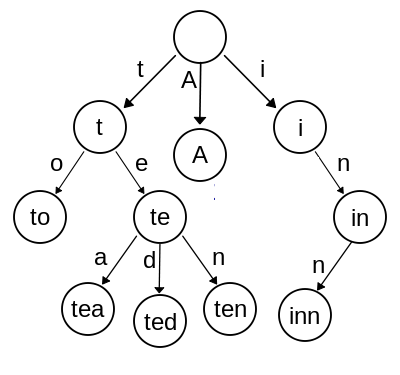

In [6]:
from pyquickhelper.helpgen import NbImage
NbImage('wiki_trie.png')

Dans un vrai trie, on ne conserve que la dernière lettre dans chaque noeud, un mot de la liste est obtenu en parcourant un chemin qui va du noeud racine jusqu'à une feuille. Plus bas, un exemple pour **ted**.

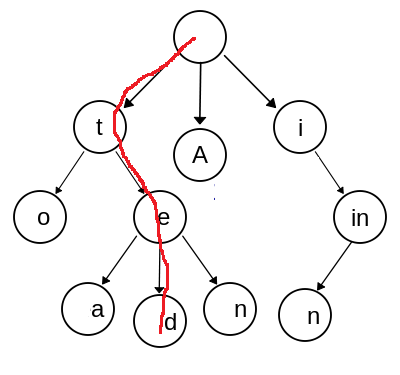

In [7]:
NbImage('wiki_trie2.png')

### Exercice 5

Construire cette structure. Les classes sont une possibilité mais ne sont pas indispensables.

In [5]:
def build_trie(mots) :
    trie = { }
    for m in mots :
        r = trie
        for c in m :
            if c not in r : r[c] = { }
            r = r[c]
    return trie

mots = [ "aaa", "aba", "aab", "baa", "bbb", "bba", "bab" ]

trie = build_trie(mots)
print(trie)

{'a': {'a': {'a': {}, 'b': {}}, 'b': {'a': {}}}, 'b': {'a': {'a': {}, 'b': {}}, 'b': {'b': {}, 'a': {}}}}


In [13]:
im_test = []
temp = im_test
temp += [2]
im_test

[2]

## Recherche dans un trie

### Exercice 6

Une fois qu'on a la structure, il faut aussi écrire la fonction qui recherche un mot dans le trie.

In [6]:
def lookup(trie, m) :
    r = trie
    for c in m :
        if c in r :
            r = r[c]
        else :
            return False
    return True

for k in mots :
    print(k, lookup(trie, k))
print("bcc", lookup(trie, "bcc"))

aaa True
aba True
aab True
baa True
bbb True
bba True
bab True
bcc False


In [7]:
def print_trie(trie, niveau = 0):
    for k,v in sorted(trie.items()):
        print("  " * niveau + k)
        if len(v) > 0 :
            print_trie(v, niveau+1)
print_trie(trie)

a
  a
    a
    b
  b
    a
b
  a
    a
    b
  b
    a
    b


### Exercice 7

Il ne reste plus qu'à mesurer le temps.

In [8]:
for N in [10, 100, 1000, 10000, 100000, 200000, 400000] :
    mots    = [ mot_alea(taille) for _ in range (N) ]
    tolook  = [ mots[ random.randint(0,len(mots)-1) ] for i in range(0,10000) ]
    trie    = build_trie(mots)
    mots.sort()

    debut = time.perf_counter()
    for k in tolook :
        i = dicho(mots, k)
    fin = time.perf_counter()
    dd = fin-debut

    debut = time.perf_counter()
    for k in tolook :
        i = lookup(trie, k)
    fin = time.perf_counter()
    dt = fin - debut

    print(N, "dicho",dd, "trie", dt)

10 dicho 0.014648099999988062 trie 0.03519829999999047
100 dicho 0.02697480000000496 trie 0.02805910000000722
1000 dicho 0.038991199999998116 trie 0.03051519999996799
10000 dicho 0.05749869999999646 trie 0.03584240000003547
100000 dicho 0.06223760000000311 trie 0.04034849999999324
200000 dicho 0.07074529999999868 trie 0.05320319999998446
400000 dicho 0.0956616999999369 trie 0.17171890000008716


In [13]:
mot = "jonathan"
sortedmot =(mot.split()).sort()